# Customer Segmentation Classification
## 95-791 Data Mining (Fall 2022) 
### Name: Claraestela Torres, William Richards, Aditya Singh
#### Date: 10/13/22


This dataset is based on an automobile company that has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). They conducted extensive market research and discovered that the new market behaves similarly to their current market.

In their existing market, the sales team classified all customers into 4 segments (A, B, C, D). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

Its sales team divided all of the customers in their current market into four divisions (A, B, C, D). After that, they performed outreach and communication strategies for a different segment of customers, and they had great success with it. Therefore, they want to apply the same method for the 2627 additional potential clients(test data).

In this project we will accomplish three tasks.

First, we will try to classify new customers accurately to one of the four market segmentation labels given by the company. This is a supervised classification task for which we have correct responses to compare our testing results with. 

Second, we are interested in the business case of when the company collects new data on new customers but does not yet know these customers' spending propensities. We will test models and identify the best model for classifying the spending score of new customers. This would make spending score our second target variable. This analysis would be done using input variables of all remaining predictors except for the market segmentation labels, which we theoretically would not already know in this business case.

Third and finally, we are interested in deploying our own unsupervised clustering models to suggest new market segmentation groups to the company. We are not certain where these four segments of (A, B, C, D) came from. There might be better ways for the company to group their customers to make targeted outreach and communications more successful. We will implement models to see test whether the company's existing segments make sense given other better methods for splitting customers into four groups. We will also test whether 4 groups is the appropriate number; perhaps more or fewer groupings would make for more accurate cluster generalizations for the target population. 

This document will clean the data, visualize some of the predictor variables, and output the cleaned split data into groups for the three tasks above.

Before starting this project we imported all the required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score 
import time

%matplotlib inline

## Part 1: Data Reading and Cleaning

We'll be working with 2 datasets, one is train.csv and the other one is test.csv. They were downloaded from Kaggle from the following link [here](https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?select=Test.csv). The data are split into roughly 80% - 20% training-testing. We put them into the `data/` directory this notebook to access.

Here's a description of the variables found in the dataset:

* **ID** - Unique ID
* **Gender** - Gender of the customer
* **Ever_Married** - Marital status of the customer
* **Age** - Age of the customer
* **Graduated** - Is the customer a graduate?
* **Profession** - Profession of the customer
* **Work_Experience** - Work Experience in years
* **Spending_Score** - (target 2) Spending score of the customer
* **Family_Size** - Number of family members for the customer (including the customer)
* **Var_1** - Anonymised Category for the customer in the training data
* **Segmentation** - (target 1) Customer Segment of the customer

We start by reading the file and saving it in 2 dataframes called train and test.

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In this step we print the data types for each column in the dataframe, and the number of missing values, by exploring if our datasets has NAs.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
# head and shape
print('Data preview:\n\n',train.head())
print('\n\n')
print(f'Training data has {test.shape[1]} columns and {train.shape[0]} observations')

Data preview:

        ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  



Training data has 11 columns and 8068 observations


In [5]:
# show null counts
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In this case the variables: `Ever_Married`, `Graduated`, `Profession`, `Work_Experience`, `Family_Size`, and `Var_1` do have Nas. Therefore we will calculate the percentage this data represents of the total to decide how to handle it.

In [6]:
# head and shape
print('Data preview:\n\n',test.head())
print('\n\n')
print(f'Testing data has {test.shape[1]} columns and {test.shape[0]} observations')

Data preview:

        ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          1.0  Cat_6            B  
1        Average          4.0  Cat_6            A  
2            Low          1.0  Cat_6            A  
3           High          2.0  Cat_6            B  
4            Low          4.0  Cat_6            A  



Testing data has 11 columns and 2627 observations


### Handling missing data

There is a relatively high degree of missingness in this data. As the below cells calculate and demonstrate, around 20% of rows contain null values in at least one column. This is true of both the training and the testing datasets.

This leaves us with three options:

1. Drop all rows with any missing values
2. Impute the missing values
3. Use models like decision trees which can better handle missing values

Because we have up to this point spent less time practicing options 2 and 3, we are going to initially take the approach of dropping null values here. Later on, we might try to use decision trees on the full datasets and compare that approach with our models here.

In [7]:
pct_drop_train = train.dropna().shape[0] / train.shape[0]
print(f'Dropping null rows from training data will leave us with {pct_drop_train:.2%} of the data')

pct_drop_test = test.dropna().shape[0] / test.shape[0]
print(f'Dropping null rows from testing data will leave us with {pct_drop_test:.2%} of the data')

Dropping null rows from training data will leave us with 82.61% of the data
Dropping null rows from testing data will leave us with 81.99% of the data


Since the data after dropping the na values is still above 80% of the total, we decided to work with the modified (cleaned) ones as the final datasets. Before we remove NA values, we first explore other aspects of the training data.

In [8]:
# eliminate NA values
train.dropna(inplace=True)
test.dropna(inplace=True)

print(f'Training rows:\t{test.shape[0]}')
print(f'Training rows:\t{train.shape[0]}')

Training rows:	2154
Training rows:	6665


Now we have 6665 training points.

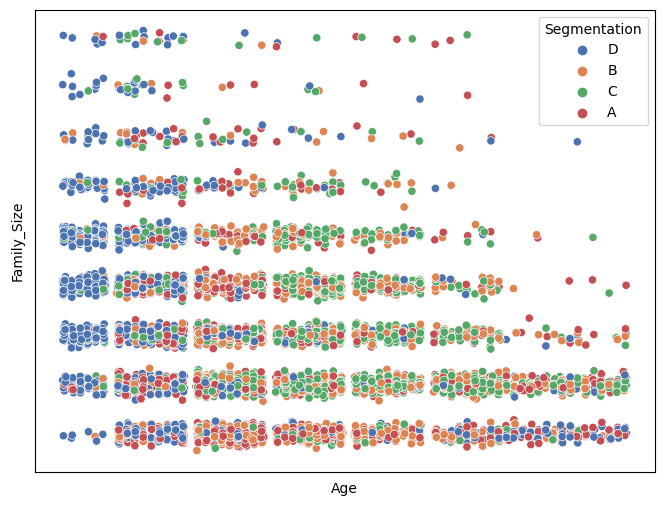

In [9]:
def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.scatterplot(x=jitter(train.Age, 2), y=jitter(train.Family_Size, 2), hue=train.Segmentation, palette='deep', ax=ax)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.show()

## Splitting the data

Since the datasets are already divided into training and testing so that we can validate our models. That divison was already made by splitting roughly 80% as training data and 20% as testing data. We separate out the `Segmentation` column as our `y` of interest, and we drop the `ID` column because it does not contain usable information for our models. We discuss our target variable more below.

In [10]:
# define splits
X_train = train.drop(columns=['Segmentation', 'ID'])
y_train = train.Segmentation
X_test = test.drop(columns=['Segmentation', 'ID'])
y_test = test.Segmentation

## Handling Categorical Variables

Many of the variables are categorical. We handle them by creating "dummy" variables. For each categorical variable with `k` levels, we introduce `k-1` columns of boolean data to tell us which category that observation belonged to. The "left out" level of the variable is the "default" for the model's parameters. This can be accomplished with either sklearn's `OneHotEncoder()` function or pandas' `get_dummies()` functions. 

The `OneHotEncoder()` function has helpful features such as remembering the new columns created for use in multiple samples (in case one sample fully excludes one or more levels of any categorical variable and thus may accidentally have too few columns). However, this data is balanced enough to use the pandas function, which we use below. 

The variables we will encode are: `Gender`, `Ever_Married`, `Graduated`, `Profession`, and `Spending_Score`.

In [11]:
# create dummy columns
X_train = pd.get_dummies(X_train, drop_first=True, 
                         columns=['Gender', 'Ever_Married','Graduated','Profession','Spending_Score', 'Var_1'])
X_test = pd.get_dummies(X_test, drop_first=True, 
                        columns=['Gender', 'Ever_Married','Graduated','Profession','Spending_Score', 'Var_1'])

In [12]:
print(X_train.columns)
print(X_test.columns)

Index(['Age', 'Work_Experience', 'Family_Size', 'Gender_Male',
       'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')
Index(['Age', 'Work_Experience', 'Family_Size', 'Gender_Male',
       'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')


## Part 2: Merging datasets

After some discussion about our project's goals, we decided to eliminate two of our candidate datasets. One of the initial datasets we were looking at existed for unsupervised clustering projects, which we have not reviewed in detail yet. The two remaining datasets existed for classification purposes. We selected the dataset with fewer columns, since both of these datasets had a high number of categorical variables and we wanted to avoid the issue of having incredible sparse data with many dummy variables. 

We are not merging any data. We are sticking with the original purpose of this dataset, which is to train a model on some input data to accurately classify some testing data.

## Part 3: Data Vizualisations

We have two vizualisations here. The first is a simple group of boxplots so we can make sure our training data looks similar to our assumptions of what they should be.

<AxesSubplot:>

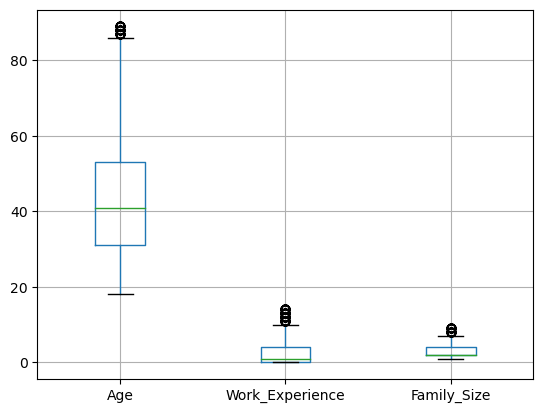

In [13]:
# subgroup our continuous variables
cont=['Age','Work_Experience','Family_Size']

train.boxplot(column=cont)

The age range for the consumers seems appropriate. The work experience ranges very low, with many individuals reporting 0 years of work. The range of family sizes clusters near low values from 0-7, with some outliers around 10 and above. All of these ranges match appropriate assumptions for what a random distribution of adults over the age of 18 would be for a company interested in consumer behavior.

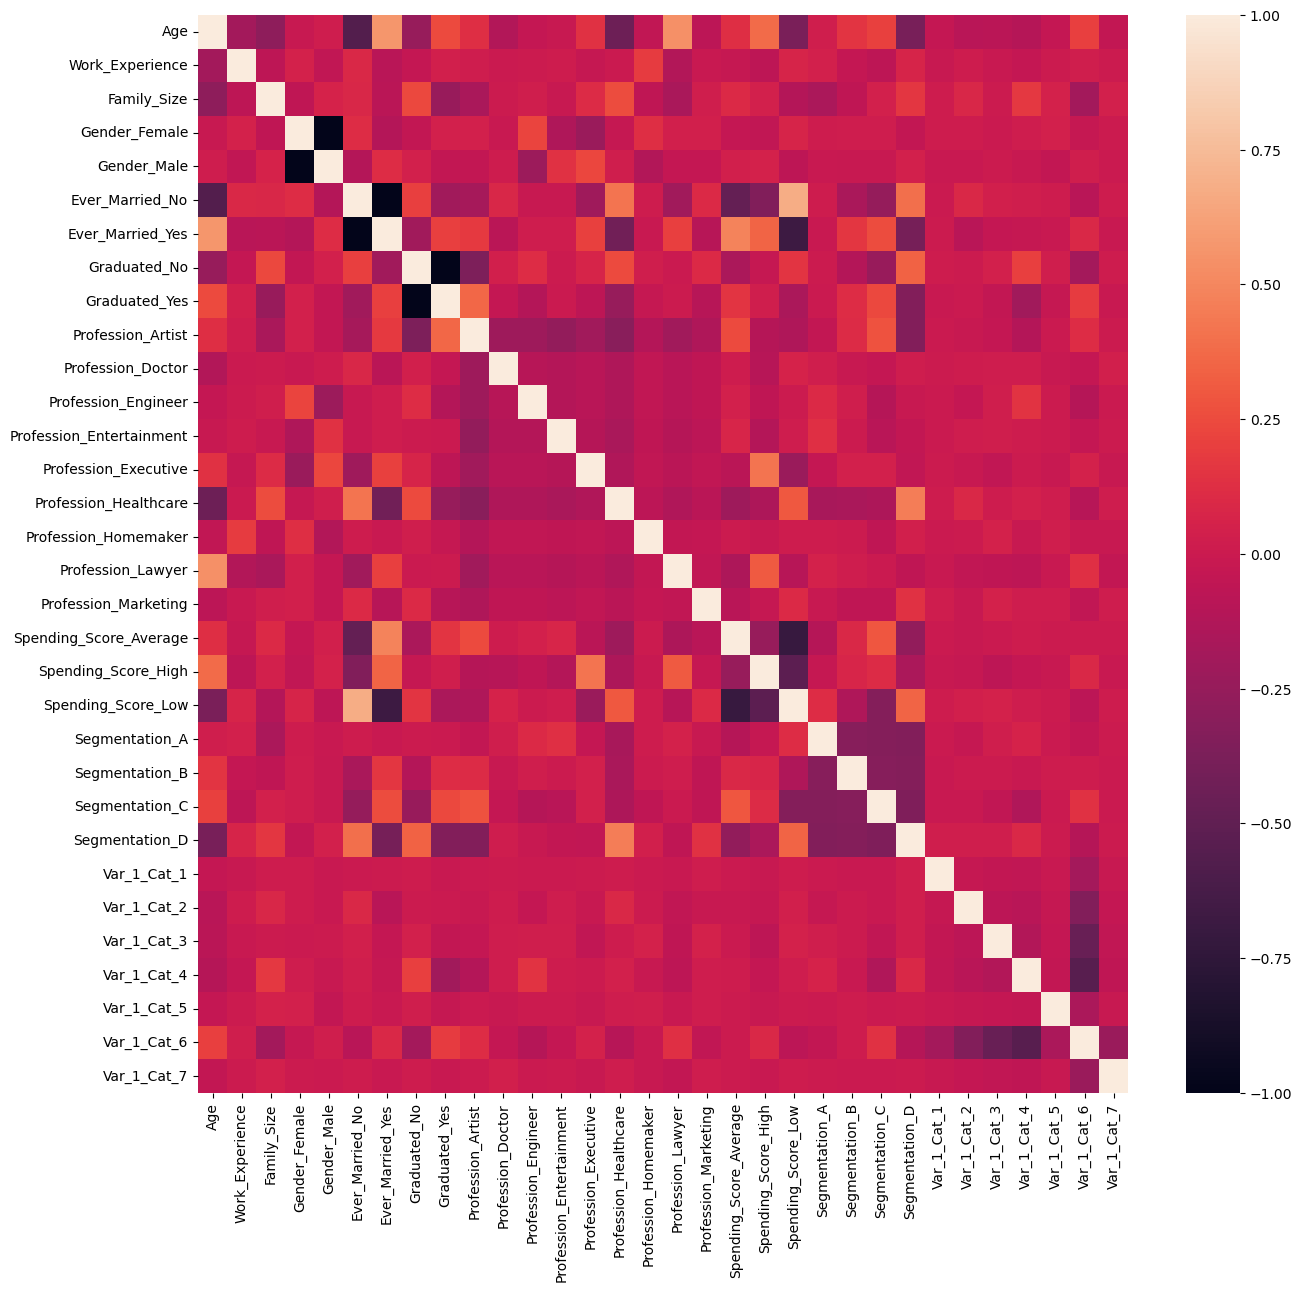

In [14]:
# briefly create a dataset with all training data except 
# the ID column creating dummy variables for categorical
# also, we will leave 
dummy_train = pd.get_dummies(
    train.drop(columns=['ID']), 
    drop_first=False,
    columns=['Gender','Ever_Married','Graduated','Profession','Spending_Score','Segmentation', 'Var_1']
)

# corr heatmap
plt.figure(figsize=(15,14))
sns.heatmap(dummy_train.corr())
plt.show()

There are many things to note from this correlation heatmap. First, as expected, the most apparent correlations are the strong negative correlations between the levels of binary categorical variables, such as `Gender_Male` and `Gender_Female`. There is also strong negative correlation between each level of `Spending_Score`. This is unsurprising and is part of the reason it is so important to drop one level of categorical variables when creating "dummy" columns to avoid collinearity. 

Second, there are a few strong high or low correlations between variables which might be important to consider in feature selection, especially with linear models. The two options for `Ever_Married` are strongly correlated with different levels of `Spending_Score`. It seems that married individuals are more likely to be "average" or "high" spenders compared to "low" spenders. Therefore, it could be possible to eliminate the `Ever_Married` feature, since it is binary and its two options correlate so well with different levels of the spending score variable. 

The anonymous `Var_1` provided in the data, with its anonymized levels, do not seem to provide much insight regarding correlations with other input or target variables. 

Finally, there are not many obviously strong correlations between our target variable and input variables. Segment D is associated with lower Age, those who have not been married, those who have not graduated college, and those who are not professional artists. These negative correlations could give us some insight into the types of individuals grouped in Segment D and could help our model better predict those in (and not in) this group.

## Part 4: Target Variables

### Task 1: Customer Classification

For this task, our target variable is the `Segmentation` variable, which has been provided by the company with possible levels (A, B, C, D). We have not been given information on what these segments mean to the company, but we are to assume these groupings are meaningful to the communications department, which plans to do targetted advertising outreach based on these groupings based on previous successful targetted advertising. 

In [15]:
# get value counts
y_train.value_counts()

D    1757
C    1720
A    1616
B    1572
Name: Segmentation, dtype: int64

With the previous count we can see that the classes are evenly balanced.

### Task 2: Income Classification

Removing the segmentation column, we reorganize the data to get the target variable of `Spending_Score` and all other variables (except `Segmentation` and `ID`) as predictors. Below the value counts for the three levels of spending score are shown. This task is slightly less balanced, with many more `Low` spenders than other categories. 

In [16]:
# define splits
inc_X_train = train.drop(columns=['Segmentation', 'ID', 'Spending_Score'])
inc_y_train = train.Spending_Score
inc_X_test = test.drop(columns=['Segmentation', 'ID', 'Spending_Score'])
inc_y_test = test.Spending_Score

# create dummy columns
inc_X_train = pd.get_dummies(inc_X_train, drop_first=True, 
                             columns=['Gender', 'Ever_Married','Graduated','Profession', 'Var_1'])
inc_X_test = pd.get_dummies(inc_X_test, drop_first=True, 
                            columns=['Gender', 'Ever_Married','Graduated','Profession', 'Var_1'])

inc_y_train.value_counts()

Low        3999
Average    1662
High       1004
Name: Spending_Score, dtype: int64

### Task 3: Clustering

For our third task, we will identify groupings based on unsupervised clustering models to come up with alternative customer segmentation groups. This will use the same data as task 1. 

## Part 5: Output intermediate data

We output the data to `.csv` files in the following folders:

* task 1: `data-segmentation/`
* task 2: `data-income/`
* task 3: `data-clustering/`

In [17]:
# task 1
X_train.to_csv('data-segmentation/X_train.csv')
X_test.to_csv('data-segmentation/X_test.csv')
y_train.to_csv('data-segmentation/y_train.csv')
y_test.to_csv('data-segmentation/y_test.csv')

In [18]:
# task 2
inc_X_train.to_csv('data-income/X_train.csv')
inc_X_test.to_csv('data-income/X_test.csv')
inc_y_train.to_csv('data-income/y_train.csv')
inc_y_test.to_csv('data-income/y_test.csv')

In [19]:
# task 3
X_train.to_csv('data-clustering/X_train.csv')
X_test.to_csv('data-clustering/X_test.csv')
y_train.to_csv('data-clustering/y_train.csv')
y_test.to_csv('data-clustering/y_test.csv')

---

## References

* [This blog](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) explaining One Hot encoding
* sklearn api
    * OneHotEncoder [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
    * LabelEncoder() [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
* pandas api
    * get_dummies() [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies)
    * value_counts (Series attribute) [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)